# Ridge and Lasso Regression

 Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.




In [12]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
#L2
from sklearn.linear_model import Ridge
#L1
from sklearn.linear_model import Lasso

## load DataSet

In [25]:
import pandas as pd


column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_df = pd.read_csv('/Users/daizhe/Downloads/ML課/不知道幹嘛的/boston_house_prices.csv', 
                         usecols=column_names)

print(boston_df.shape)
boston_df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## 波士頓房價

檔案中包含506條樣本資料，即有506條房價資料，而13表示有13個影響房價的特徵值
特徵值解釋如下表
![波士頓房價檔案部分中英文標題](images/boston_1.png)

In [26]:
# Display dataset information
print("資料包內含資料的key值：", list(boston_df.columns))  # Using column names as "keys"
print("資料欄位名稱(資料特徵參數)：", boston_df.columns.tolist())
print("資料筆數 (rows, columns):", boston_df.shape)

# Extracting and displaying target values
target_values = boston_df['MEDV']
print("前10筆 target (房價):", target_values.head(10).values)

# Convert to pandas DataFrame (already in DataFrame format)
print("pandas DataFrame (前5筆):\n", boston_df.head())

# Show summary statistics
print("\n📊 數據摘要統計:\n", boston_df.describe())


'''
print("資料包內含資料的key值：", boston.keys())
print("資料欄位名稱(資料特徵參數)：",boston.feature_names)
print("檔案位置:",boston['filename'])
print("第一筆資料:",boston.data[:1])
print("資料型別:",type(boston.data))


target_names = boston.target
print("資料size:",boston['data'].size)
print("前10筆target_names(房價): ", boston['target'][:10])
#print(boston.target)


#組成 pandas DataFrame (資料表的方式顯示)
x = pd.DataFrame(boston['data'], columns=boston['feature_names'])
print("pandas DataFrame\n",x.head(5),sep='')'
'''

資料包內含資料的key值： ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
資料欄位名稱(資料特徵參數)： ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
資料筆數 (rows, columns): (506, 14)
前10筆 target (房價): [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]
pandas DataFrame (前5筆):
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


'\nprint("資料包內含資料的key值：", boston.keys())\nprint("資料欄位名稱(資料特徵參數)：",boston.feature_names)\nprint("檔案位置:",boston[\'filename\'])\nprint("第一筆資料:",boston.data[:1])\nprint("資料型別:",type(boston.data))\n\n\ntarget_names = boston.target\nprint("資料size:",boston[\'data\'].size)\nprint("前10筆target_names(房價): ", boston[\'target\'][:10])\n#print(boston.target)\n\n\n#組成 pandas DataFrame (資料表的方式顯示)\nx = pd.DataFrame(boston[\'data\'], columns=boston[\'feature_names\'])\nprint("pandas DataFrame\n",x.head(5),sep=\'\')\'\n'

In [27]:
data_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
target_names = ['MEDV']
x = pd.read_csv('/Users/daizhe/Downloads/ML課/不知道幹嘛的/boston_house_prices.csv', 
                         usecols=data_names)
y = pd.read_csv('/Users/daizhe/Downloads/ML課/不知道幹嘛的/boston_house_prices.csv', 
                         usecols=target_names)

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=17)
print(len(X_test), len(y_test))

print(len(X_train), len(y_train))

152 152
354 354


In [28]:
x.shape

(506, 13)

## Create a Ridge Regression
       shrinking coefficient magnitude using Ridge regression
       
###   Ridge (L2 norm)
![image.png](https://miro.medium.com/max/1374/1*hAGhQehrqAmT1pvz3q4t8Q.png)
 
![image.png](https://miro.medium.com/max/670/1*sC4KLMHU0j_1gR3VmlgGtg.png)


In [29]:
# in the first picture above
'''
b=w0(the intercept) is often included in notation, but sometimes its omitted for simplicity.
If omitted, it means the regression model assumes centered data (i.e., mean of x is 0).
that is to say sum of all x and sum of all y =0
'''
# as for second picture
'''
This represents the constraint used in Ridge Regression:

Instead of minimizing the sum of squared errors directly, Ridge Regression adds a constraint that limits the sum of squared weights.
c is a positive constant that controls how much regularization is applied.

The idea: Prevents overfitting by forcing weights to be small.
This constraint is equivalent to the Lagrange formulation, where we use 𝜆 as a tuning parameter instead of directly setting c
'''
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.coef_)

rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)


[[-1.15150051e-01  5.57861208e-02  6.75501282e-02  3.48069030e+00
  -1.71527019e+01  3.32425021e+00 -1.55950549e-04 -1.47390020e+00
   3.08542102e-01 -1.30867333e-02 -9.41592286e-01  8.12624556e-03
  -5.73037455e-01]]
linear regression train score: 0.7295579805153971
linear regression test score: 0.7620882852026807
ridge regression train score low alpha: 0.729557098200197
ridge regression test score low alpha: 0.7620400292145657
ridge regression train score high alpha: 0.7042611990723432
ridge regression test score high alpha: 0.7239513142703007


In [30]:
rr.coef_ #x total have 13 features

array([-1.15050100e-01,  5.57874015e-02,  6.69630507e-02,  3.47946611e+00,
       -1.69913086e+01,  3.32499878e+00, -2.94274608e-04, -1.47116573e+00,
        3.08100947e-01, -1.30940022e-02, -9.39867709e-01,  8.13348610e-03,
       -5.73327876e-01])

In [ ]:
print(type(rr.coef_))
np.ravel(rr.coef_) #turn 2D to 1D


<class 'numpy.ndarray'>


array([-1.15050100e-01,  5.57874015e-02,  6.69630507e-02,  3.47946611e+00,
       -1.69913086e+01,  3.32499878e+00, -2.94274608e-04, -1.47116573e+00,
        3.08100947e-01, -1.30940022e-02, -9.39867709e-01,  8.13348610e-03,
       -5.73327876e-01])


### $\alpha$ 愈小則等同於Linear Regression; $\alpha$ 愈大則會限制$\omega$ 的值。<br>這將使得在一定iteration下不一定能找到最低值, 即loss是增加的

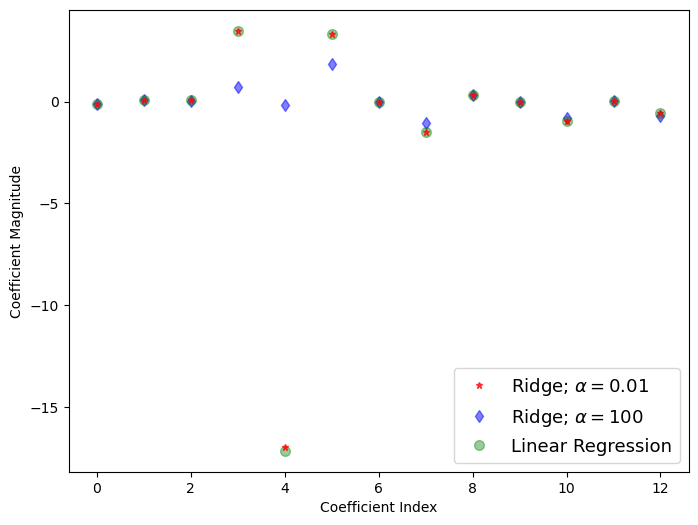

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(np.ravel(rr.coef_),alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers # zorder for ordering the markers
plt.plot(np.ravel(rr100.coef_),alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(np.ravel(lr.coef_),alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(fontsize=13,loc=4)
plt.show()

#we can see that in small alpha, this almost equal to no regression
#large ridge, flatter line

## Create a Lasso Regression


### Lasso (L1 norm)
 ![image.png](https://miro.medium.com/max/1402/1*P5Lq5mAi4WAch7oIeiS3WA.png)
 
 ![image.png](https://miro.medium.com/max/949/1*JH9eAS2I9mwOpuFLg-gD6g.png)


In [35]:
lasso = Lasso(alpha=1) #default alpha=1
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)

coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score )
print("test score: ", test_score)
#Lasso(alpha=0.01)
print("number of features used: ", coeff_used)
print(lasso)

training score: 0.6729995212126497
test score:  0.6860935061913387
number of features used:  10
Lasso(alpha=1)


In [36]:
lasso.coef_

array([-0.07111644,  0.05177516,  0.        ,  0.        , -0.        ,
        0.75572556,  0.01871781, -0.66719292,  0.22962357, -0.01244805,
       -0.71863208,  0.00707191, -0.78865589])

In [38]:
#Lasso(alpha=0.01)
lasso001 = Lasso(alpha=0.01, max_iter=10000000)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01:", train_score001 )
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)
print('-'*20)
#Lasso(alpha=0.0001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10000000)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for alpha=0.0001:", train_score00001)
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

#LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print('-'*20)
print("LR training score:", lr_train_score)
print("LR test score: ", lr_test_score)

training score for alpha=0.01: 0.7291377515716821
test score for alpha =0.01:  0.7608534988700584
number of features used: for alpha =0.01: 13
--------------------
training score for alpha=0.0001: 0.7295579384876596
test score for alpha =0.0001:  0.7620812044613889
number of features used: for alpha =0.0001: 13
--------------------
LR training score: 0.7295579805153971
LR test score:  0.7620882852026807



### $\alpha$=0.01 會比$\alpha$=0.1 使$\omega$ 更小<br> 若$\omega$ 很小等於Linear regression 這將使得在一定iteration下不一定能找到最低值, 即loss是增加的

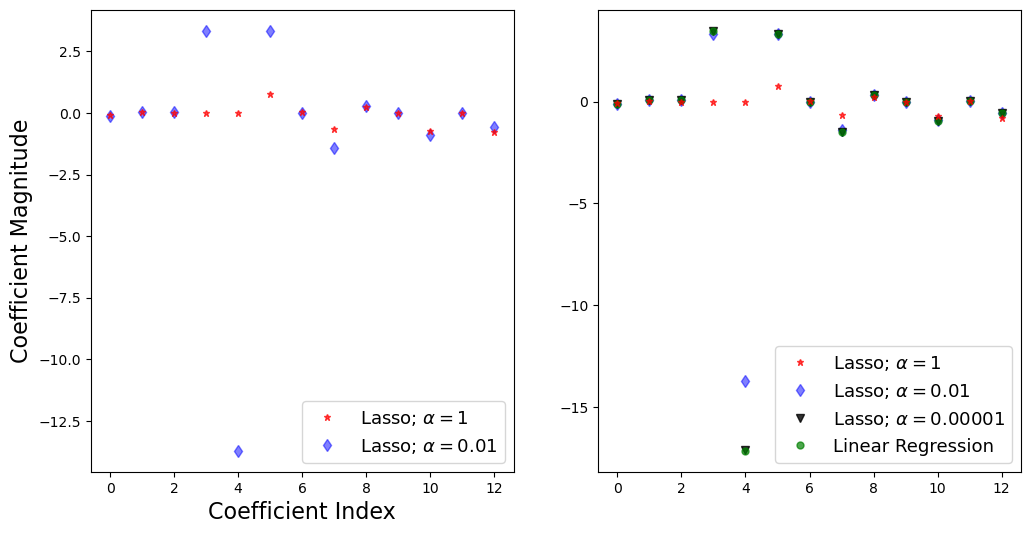

In [39]:
plt.figure(figsize=(12, 6),)
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(np.ravel(lr.coef_),alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)

plt.legend(fontsize=13,loc=4)

plt.show()

愈高維度時, Lassso 愈有機會只使用部份特徵(部份切面)來找到低點, 而Ridge像球體一樣無法只用部份特徵才找到最低點

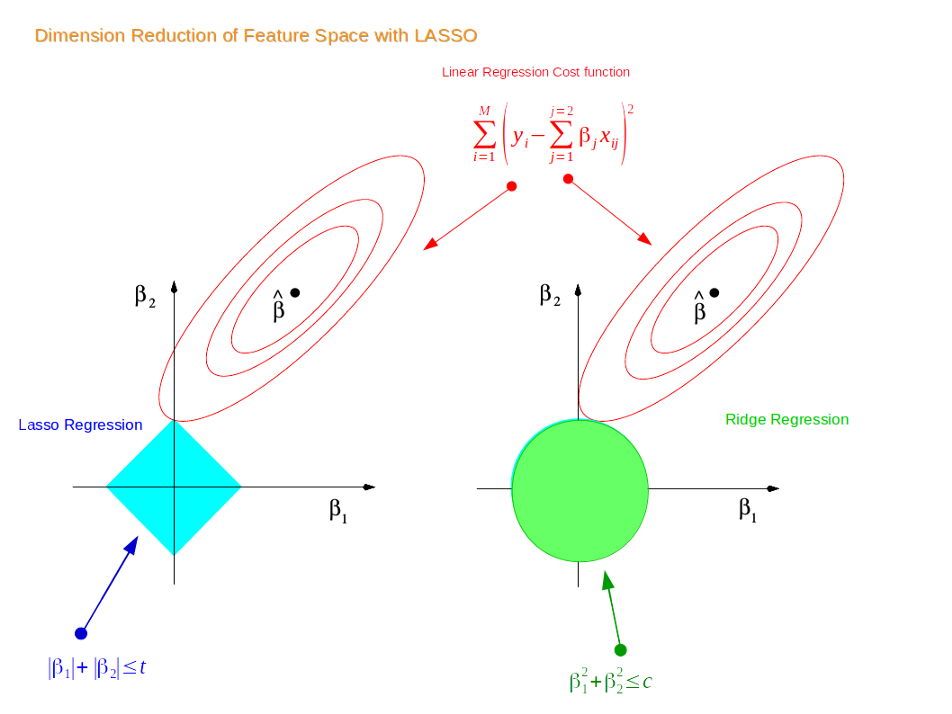

## R2 Score 

In [40]:
from sklearn.metrics import r2_score
#R2 square
r2_score(y_test,rr100.predict(X_test))

0.7239513142703007